### Namespaces

A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

There are 4 types of namespaces:
- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace

### Scope and LEGB Rule (Local,enclosing,global,build-in)

A scope is a textual region of a Python program where a namespace is directly accessible.

The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.

In [ ]:
# local and global
# global var
a = 2

def temp():
  # local var
  b = 3
  print(b)

temp()
print(a)

3
2


In [ ]:
# local and global -> same name
a = 2

def temp():
  # local var
  a = 3   # one a is a namespace inside global scope and other namespace is in local scope
  print(b)

temp()
print(a)

In [ ]:
# local and global -> local does not have but global has
a = 2

def temp():
  # local var
  print(a)

temp()
print(a)


2
2


In [ ]:
# local and global -> editing global
a = 2

def temp():
  # local var
  a += 1  # we cannot edit global variable inside a local scope
  print(a)

temp()
print(a)

UnboundLocalError: ignored

In [ ]:
a = 2

def temp():
  # local var
  global a
  a += 1 # using global keyword, we can change a global variable inside local scope
  print(a)

temp()
print(a)

3
3


In [1]:
# local and global -> global created inside local
def temp():
  # local var
  global a  # we can create a global variable inside a local scope
  a = 1
  print(a)

temp()
print(a)

1
1


In [2]:
# local and global -> function parameter is local
def temp(z): # parameter of a function is always a local variable
  # local var
  print(z)

a = 5
temp(5)
print(a)

5
5


In [ ]:
# local and global -> function parameter is local
def temp(z): # parameter of a function is always a local variable
  # local var
  print(z)

a = 5
temp(5)
print(a)
print(z) # z is outside its local scope

5
5


NameError: ignored

# built-in scope

When python got turned on then it will load some variable in built-in scope which we can use without any issue.

It is above global scope. Some examples are shown above.

In [3]:
# how to see all the built-ins
import builtins
print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWar

In [4]:
# renaming built-ins
L = [1,2,3] # part of global scope
max(L) # part of built-in scope

3

In [7]:
# renaming built-ins
L = [1,2,3]
print(max())
def max():  # if max function is present in global then we don't go to built-in function
  print('hello')

hello
None


In [ ]:
# renaming built-ins
L = [1,2,3]
print(max(L))
def max():  # if max function is present in global then we don't go to built-in function
  print('hello')

print(max(L))

TypeError: ignored

## In above code, first built-in max function will work as no max function in local scope is present.
## Then max function in local scope will get created and it will give result.
## After that built-in max function will not work as max function of local scope will get execute.

So, order matters here.

# Enclosing scope (non-local scope)
Enclosing scope can be seen in nested function

In [8]:
def outer():
  def inner():
    print('inner function')
  inner()
  print('outer function')

outer()
print('main program')

inner function
outer function
main program


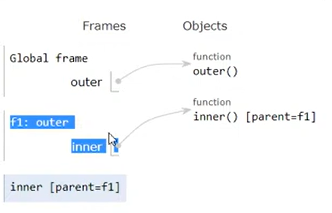

- The top-most is global scope consists main function
- The middle is enclosing scope consists outer function
- THe bottom-most is local scope consists of inner function

In [9]:
def outer():
  a=3
  def inner():
    a=4
    print(a) # a is present in the local scope so 4 will print
  inner()
  print('outer function')

a=1
outer()
print('main program')

4
outer function
main program


In [10]:
def outer():
  a=3
  def inner():
    print(a) # a is present in the enclosing scope so 3 will print
  inner()
  print('outer function')

a=1
outer()
print('main program')

3
outer function
main program


In [11]:
def outer():
  def inner():
    print(a) # a is present in the global scope so 1 will print
  inner()
  print('outer function')

a=1
outer()
print('main program')

1
outer function
main program


In [12]:
def outer():
  def inner():
    print(a) # a is not present in this code. So python will search a in built-in scope (it is not present in built-in so it will show an error)
  inner() # and this will throw an error like a is not defined (not showing in google collab as all cells are connected and printing previous defined value)
  print('outer function')

outer()
print('main program')

1
outer function
main program


In [13]:
# nonlocal keyword
def outer():
  a = 1
  def inner():
    a += 1  # we cannot directly change a variable present in enclosing scope using local scope
    print('inner',a)
  inner()
  print('outer',a)


outer()
print('main program')

UnboundLocalError: local variable 'a' referenced before assignment

In [14]:
# nonlocal keyword
def outer():
  a = 1
  def inner():
    nonlocal a  # we can change a variable present in enclosing scope using local scope using nonlocal keyword
    a += 1
    print('inner',a)
  inner()
  print('outer',a)


outer()
print('main program')

inner 2
outer 2
main program


### Decorators

A decorator in python is a function that receives another function as input and adds some functionality(decoration) to and it and returns it.

This can happen only because python functions are 1st class citizens. First class citizens are those objects on which we can perform all functionality.

There are 2 types of decorators available in python
- `Built in decorators` like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- `User defined decorators` that we programmers can create according to our needs

In [15]:
# Python are 1st class function

def func():
  print("Hello")

a=func
a()

Hello


In [16]:
# Python are 1st class function

def func():
  print("Hello")

del func
func()

NameError: name 'func' is not defined

In [ ]:
# Python are 1st class function

def modify(func,num): # we can give one function as argument to another function in python
  return func(num)

def square(num):
  return num**2

modify(square,2)

4

In [ ]:
# simple example

def my_decorator(func): # my_decorator function will receive an function
  def wrapper():
    print('***********************')
    func()  # function will remain in memory while wrapper started its execution
    print('***********************')
  return wrapper

def hello():
  print('hello')

def display():
  print('hello nitish')

a = my_decorator(hello) # my_decorator function will return wrapper function
a() # we are calling inner wrapper function here

b = my_decorator(display) # we can decorate any function using my_decorator
b() # we are calling inner wrapper function here

***********************
hello
***********************
***********************
hello nitish
***********************


The catch here is wrapper function is able to access func() from the memory even after the execution of my_decorator function.

In [17]:
# more functions
def outer():
  a=5
  def inner():
    print(a)
  return inner

b=outer()
b()

5


When a function removes from memory after its complete execution then all its variable also gets removed from memory.

In above code, this is a special case. When a function returns its inner function then its variable and the function itself remains in the memory. As returned inner function might use its variable in future.

The above code is showing the same thing (a is still accessible inside inner class).

This property is known as __CLOSURE__ .

In closure property, inner function can still access the variables of its parent function even after its complete execution.

In [ ]:
# Better syntax?
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

@my_decorator
def hello():
  print('hello')

hello()

***********************
hello
***********************


In [19]:
# anything meaningful?
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func()
    print('time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('hello world')
  time.sleep(2)

@timer
def square(num):
  time.sleep(1)
  print(num**2)

square(2)

TypeError: square() missing 1 required positional argument: 'num'

In [18]:
# anything meaningful?
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func(*args)
    print('time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello(): # we are sending hello function to timer decorator
  print('hello world')
  time.sleep(2)

@timer
def square(num):
  time.sleep(1)
  print(num**2)

@timer
def power(a,b):
  print(a**b)

hello()
square(2)
power(2,3)


hello world
time taken by hello 2.0013527870178223 secs
4
time taken by square 1.0012319087982178 secs
8
time taken by power 3.4809112548828125e-05 secs


## func.__ name__  : This is how we print a function actual name

In [ ]:
# One last example -> decorators with arguments

In [20]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('This datatype will not work.')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

square("Hello")

TypeError: This datatype will not work.

In [21]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('This datatype will not work.')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

square(2)

4


In [23]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('This datatype will not work.')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

@sanity_check(str)
def greet(name):
  print('Hello',name)

greet('Deepa Gupta')

Hello Deepa Gupta
